In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Produce the legendre wights and points
from scipy.special import roots_legendre

def gauss_legendre_weights_points(n):
    # Get the Gauss-Legendre roots and weights using scipy's function
    roots, weights = roots_legendre(n)
    
    return roots, weights

# Number of points
n = 75

roots, weights = gauss_legendre_weights_points(n)
# print("Gauss-Legendre roots:", roots)
# print("Gauss-Legendre weights:", weights)


In [3]:
x_nodes = np.array(roots)
w = np.array(weights)

In [4]:
## define the function
def f(x):
    return np.cos(x)

In [5]:
def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(-2*x)

## Numerical Approximation function

$$ L(f(t)) = \int_0^\infty e^{-st}f(t) dt$$

<center>  let  $y = e^{-st} $ </center>
$$ e^{-st}dt = -sdy $$
$$ t = \frac{-ln(y)}{s} $$
$$ L(f(t)) = \frac{1}{s} \int_0^1 f({\frac{-lny}{s}}) dy$$
<center>  let  $b = 2y-1 $ </center>
<center>  let  $y = \frac{b+1}{2} $ </center>
$$ dy = \frac{db}{2} $$
$$ F(s) =  \frac{1}{2s} \int_{-1}^1 f({\frac{-ln\frac{b+1}{2}}{s}}) db$$
<center>  let  $g(b,s) = f({\frac{-ln\frac{b+1}{2}}{s}}) $     ..(transformation function) </center>
$$ F(s) =  \frac{1}{2s} \int_{-1}^1 g(b,s)db $$
<center>  apply gauss legendre quadrature </center>

$$ F(s) = \frac{1}{2s} \sum_{i=1}^n w_ig(x_i,s) $$


In [6]:
def transformation(x):
    return lambda s: -np.log((x+1)/2)/s
    

In [7]:
def couple_f(f,s:float, transformation = transformation,x=x_nodes):
    a = transformation(x)
    return f(a(s))

In [8]:
# couple_f(f,2.0)

In [9]:
def n_L_t(s,x = x_nodes, w = w,transformation = transformation,couple_f = couple_f, func = f):
    ## other parameters are left for experimental purposes,
    ## function can be tweaked for other purposes.
    return sum(couple_f(func,s,x=x,transformation = transformation) * w)/(2 * s)

In [10]:
def h(f):
    # final numerical transformation function, 
    return lambda s: n_L_t(s,func=f)

In [21]:
AL_f1 = np.vectorize(h(f))

In [22]:
AL_f1(3)

array(0.29999562)

## Exact laplace functions

In [13]:
def exact_laplace(x):
    return x/(x**2 +1)

In [14]:
def exact_L_f2(s):
    # laplace of sin x
    return 1/(s**2 + 1)

def exact_L_f3(s):
    ## laplace of e^-2x
    return 1/(s+2)

## Plotting function

In [27]:
s = np.linspace(0.1,40,100)

In [28]:
fs = exact_laplace(s)
def plot_function(EL,AL,S,ylim = (0,0.7)):
    fig , ax = plt.subplots(1,2, figsize = (12,5))
    fs = EL(S)
    ht = AL(S)
    ax[0].plot(S,fs)
    ax[1].plot(S,ht)
    ax[0].set_ylim(ylim)
    ax[1].set_ylim(ylim)
    ax[0].set_title('Exact laplace function')
    ax[1].set_title('Approximate laplace function')

    ax[0].set_xlabel('S')
    ax[0].set_ylabel('F(S)')
    ax[1].set_xlabel('S')
    ax[1].set_ylabel('F(S)')
    plt.show()

## Comparing

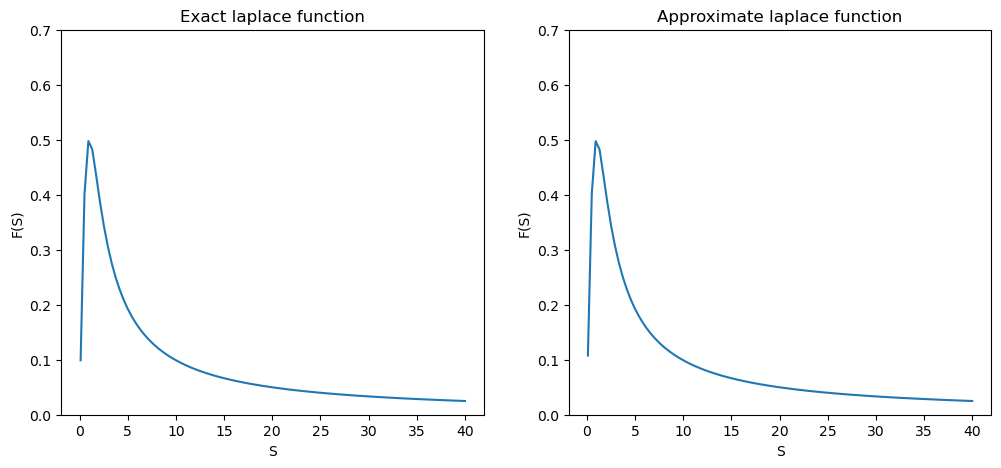

In [29]:
plot_function(exact_laplace,AL_f1,s)

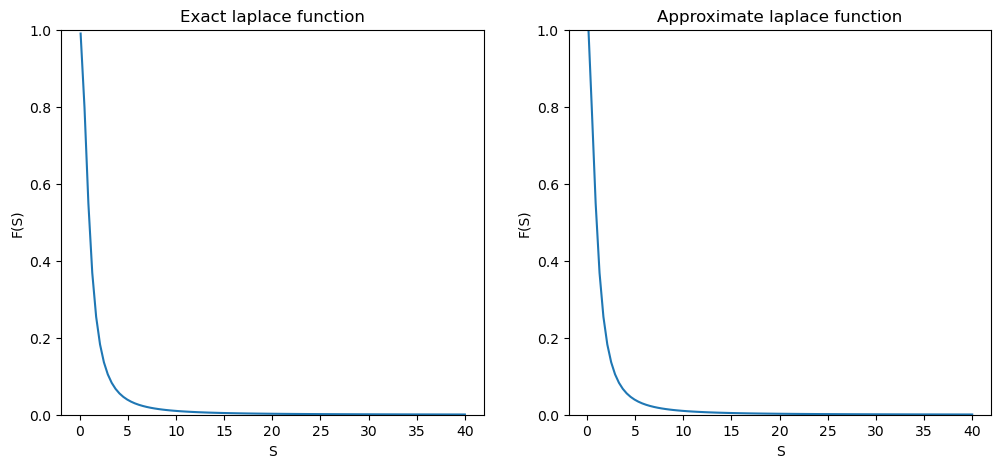

In [30]:
AL = np.vectorize(h(f2))
plot_function(exact_L_f2,AL,s,(0,1))

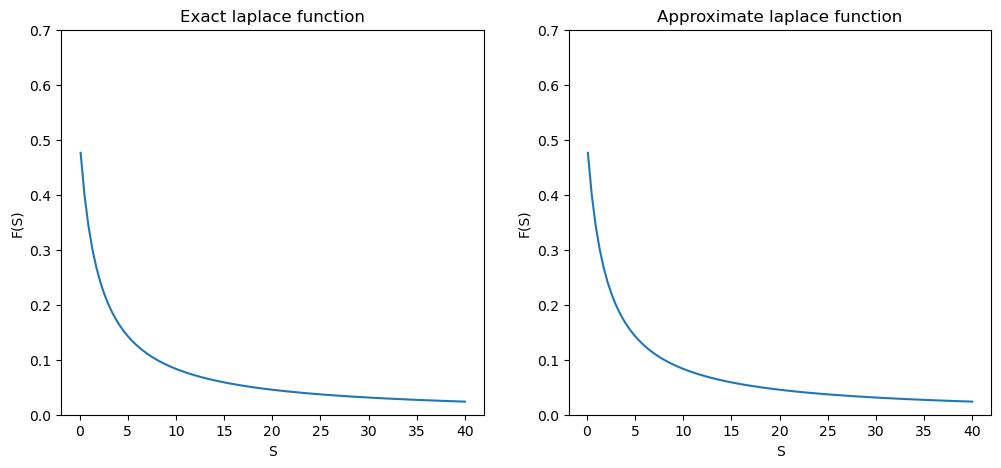

In [31]:
AL = np.vectorize(h(f3))  ## approximate laplace
plot_function(exact_L_f3,AL,s,(0,0.7))